**SHETH L.U.J & SIR M.V COLLEGE**

DATA SCIENCE

T094 : Shubhangi Mane

AIM : Construct a decision tree model and interpret the decision rules for classification.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


In [ ]:
# Load dataset
df = pd.read_csv("women_clothing_ecommerce_sales.csv")
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [ ]:
# Create binary target: high revenue
df['high_revenue'] = (df['revenue'] >= df['revenue'].median()).astype(int)
target = 'high_revenue'

# Select features
features = ['sku', 'size', 'unit_price', 'quantity']  # exclude revenue to avoid leakage
df = df[features + [target]]
df.head()


,sku,size,unit_price,quantity,high_revenue
0,708,2XL,298,1,1
1,89,2XL,258,1,0
2,bobo,One Size,228,1,0
3,799,XL,264,1,0
4,799,M,264,1,0


In [ ]:
df.isnull().sum()

,0
sku,0
size,37
unit_price,0
quantity,0
high_revenue,0


In [ ]:
# Fill missing numeric columns with mean
for col in ['unit_price', 'quantity']:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical columns with mode
for col in ['sku', 'size']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()


,0
sku,0
size,0
unit_price,0
quantity,0
high_revenue,0


In [ ]:
le_sku = LabelEncoder()
le_size = LabelEncoder()

df['sku'] = le_sku.fit_transform(df['sku'])
df['size'] = le_size.fit_transform(df['size'])

df.head()


,sku,size,unit_price,quantity,high_revenue
0,15,0,298,1,1
1,20,0,258,1,0
2,23,6,228,1,0
3,18,8,264,1,0
4,18,4,264,1,0


In [ ]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101, stratify=y
)
print("Train-test split completed!")


Train-test split completed!


In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train, y_train)
print("Model trained!")

# Evaluate
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

print("Test Accuracy:", accuracy_score(y_test, pred_test))
print("Train Accuracy:", accuracy_score(y_train, pred_train))


Model trained!
Test Accuracy: 1.0
Train Accuracy: 1.0


In [ ]:
print("---- Test Report ----")
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

print("\n---- Train Report ----")
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))


---- Test Report ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        84

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

[[75  0]
 [ 0 84]]

---- Train Report ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       195

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

[[173   0]
 [  0 195]]


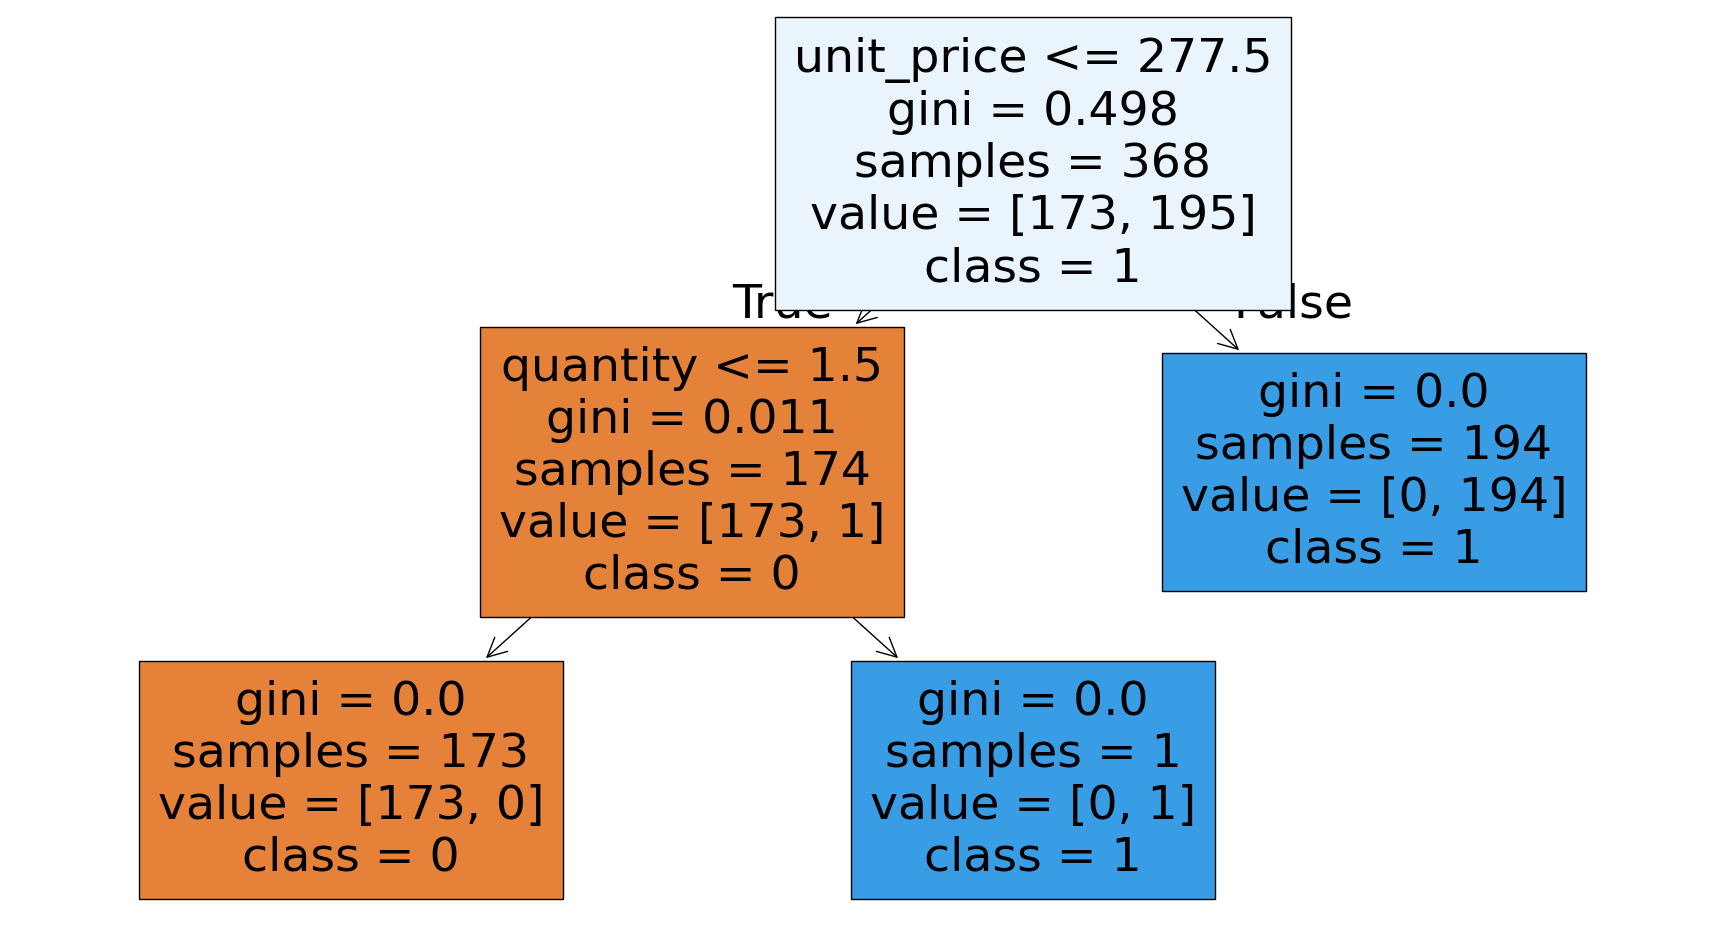

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode target to get class names
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

class_names = [str(cls) for cls in le_target.classes_]  # convert to string

plt.figure(figsize=(22,12))
tree.plot_tree(clf_pruned,
               filled=True,
               feature_names=features,
               class_names=class_names)
plt.show()


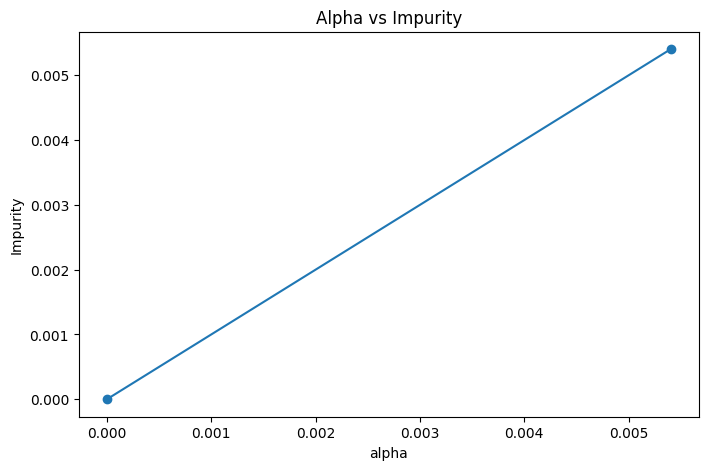

In [ ]:
# Cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel("alpha")
plt.ylabel("Impurity")
plt.title("Alpha vs Impurity")
plt.show()


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_tmp = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_tmp.fit(X_train, y_train)
    clfs.append(clf_tmp)

print("Total trees trained:", len(clfs))


Total trees trained: 3


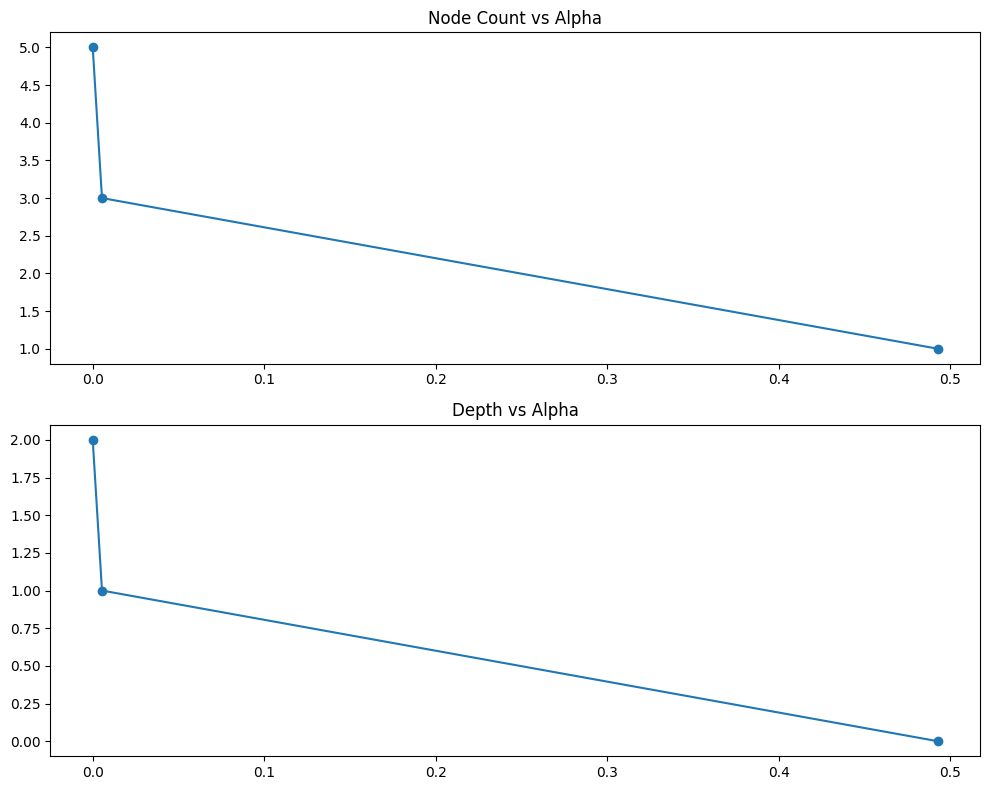

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2,1, figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o')
ax[0].set_title("Node Count vs Alpha")
ax[1].plot(ccp_alphas, depths, marker='o')
ax[1].set_title("Depth vs Alpha")
plt.tight_layout()
plt.show()


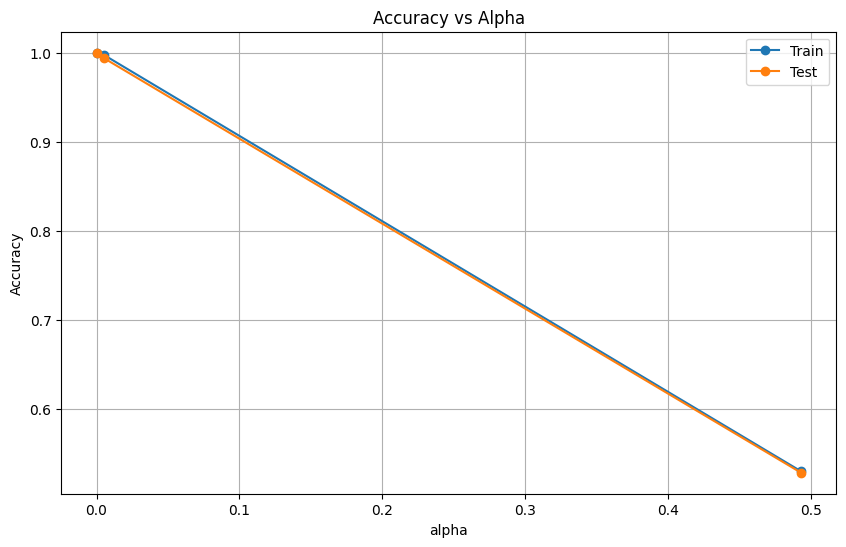

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Select alpha with highest test score
best_idx = np.argmax(test_scores)
best_alpha = ccp_alphas[best_idx]
print("Best alpha:", best_alpha)

clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)

print("Test Accuracy:", accuracy_score(y_test, clf_pruned.predict(X_test)))
print("Train Accuracy:", accuracy_score(y_train, clf_pruned.predict(X_train)))


Best alpha: 0.0
Test Accuracy: 1.0
Train Accuracy: 1.0


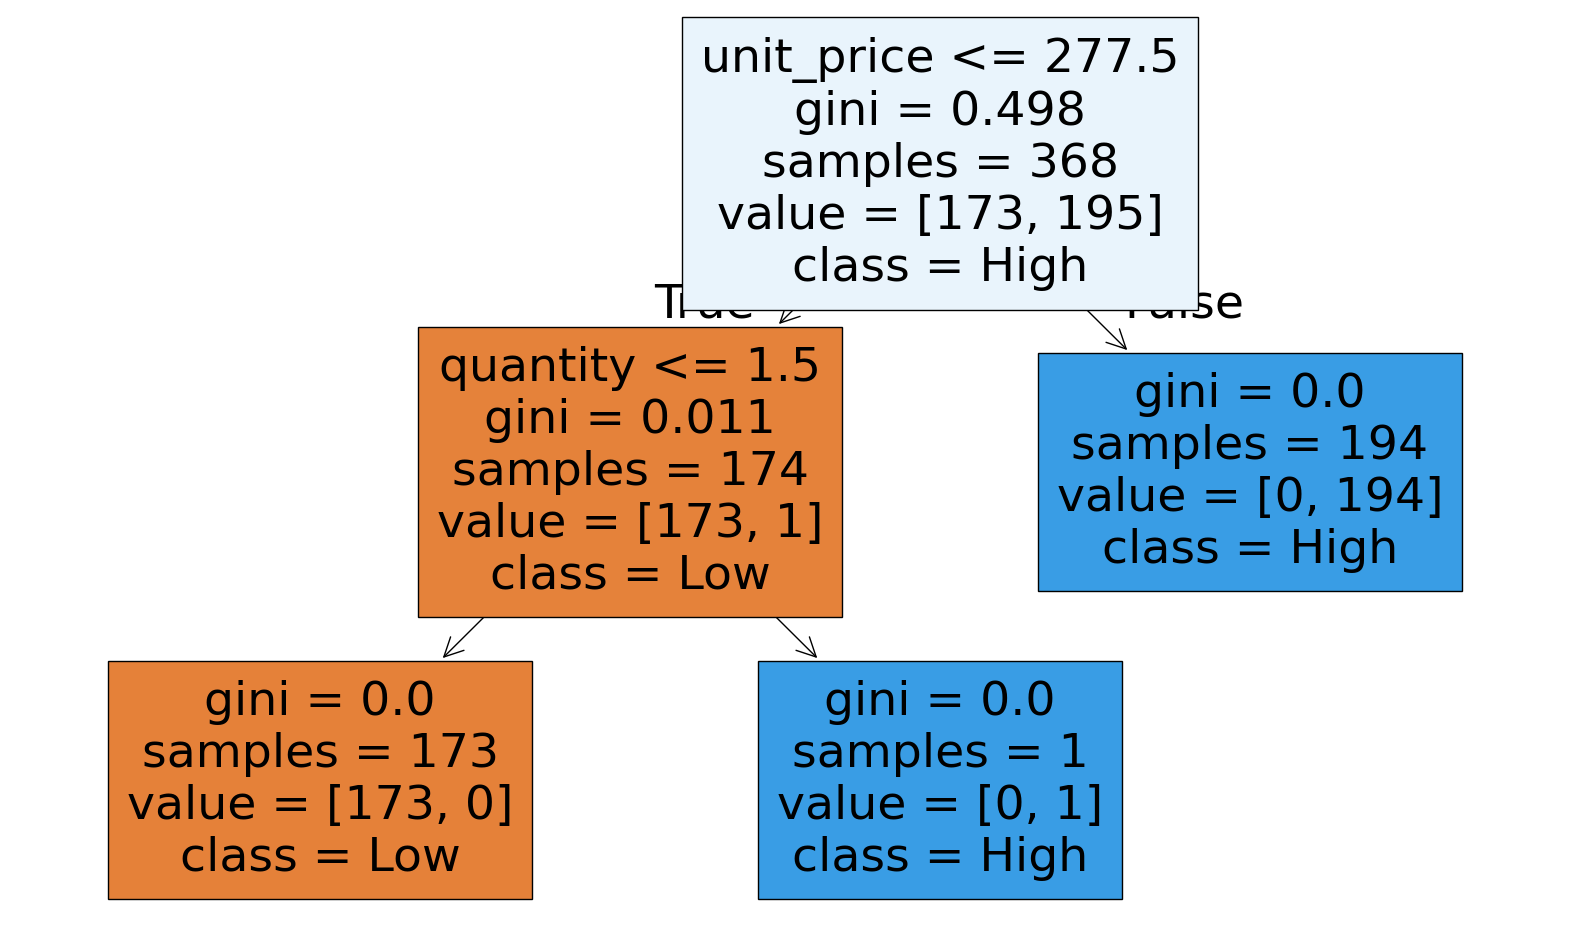

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(clf_pruned, filled=True, feature_names=features, class_names=['Low','High'])
plt.show()


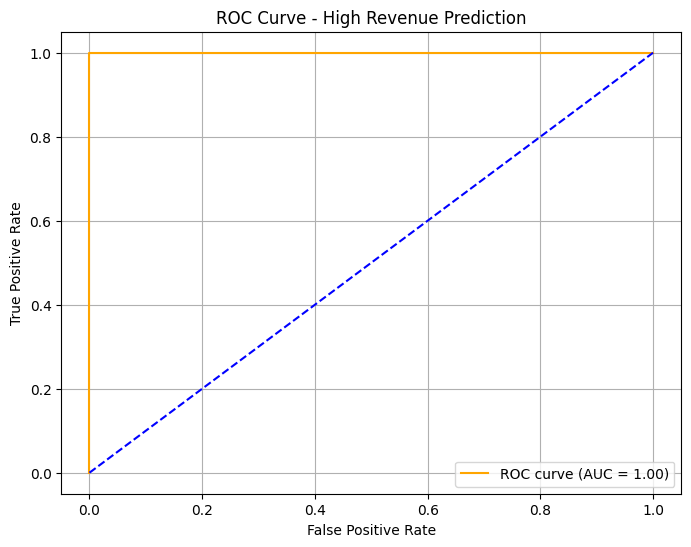

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for positive class
y_pred_proba = clf_pruned.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High Revenue Prediction')
plt.legend()
plt.grid()
plt.show()
